In [1]:
import matplotlib.pyplot as plt
import torch

import seaborn as sns
import numpy as np

In [2]:
results = torch.load('./results')

In [3]:
correct = (results['targets'] == results['pred'])
attacked = results['attacked']

perturbed_accuracy = (correct & (~attacked)).mean(axis=1)

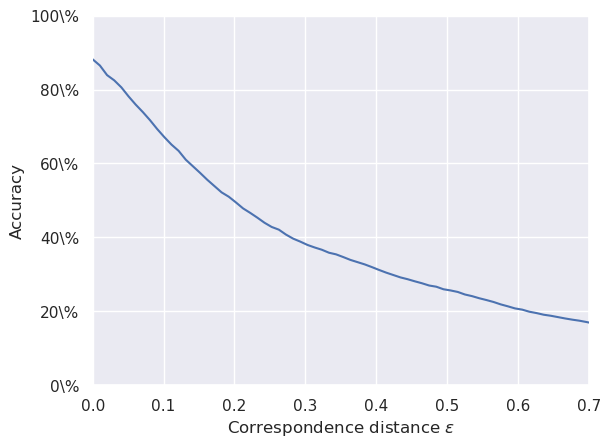

In [4]:
for format in ['pdf', 'pgf']:
    plt.clf()
    plt.cla()

    sns.set_theme()

    pal = sns.color_palette('colorblind', n_colors=1)
    plt.plot(np.linspace(0, 1, 100), perturbed_accuracy, clip_on=True, zorder=3)
    plt.xlim(0, 0.7)
    plt.ylim(0, 1)

    plt.yticks(ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=['0\%', '20\%', '40\%', '60\%', '80\%', '100\%'])

    plt.ylabel('Accuracy')
    plt.xlabel('Correspondence distance $\epsilon$')
